In [53]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import talib
import os
import statsmodels

In [60]:
#df=ts.get_k_data('600600') #直接使用tushare包获取股票最新数据
excel_path = os.path.join('/Users','liuhuanshuo','desktop','作业','量化','单佳雷数据','沪A股票原始数据/') + '601939.SH' + '.xls'
df = pd.read_excel(excel_path) 
df = df.loc[:,['代码','日期','开盘价(元)','收盘价(元)']]
df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,代码,日期,开盘价(元),收盘价(元)
0,601939.SH,2016-01-04,5.4590,5.2982
1,601939.SH,2016-01-05,5.2225,5.2793
2,601939.SH,2016-01-06,5.2793,5.3360
3,601939.SH,2016-01-07,5.2982,5.1941
4,601939.SH,2016-01-08,5.2793,5.2414
5,601939.SH,2016-01-11,5.1941,5.0144
6,601939.SH,2016-01-12,5.0522,4.9860
7,601939.SH,2016-01-13,5.0522,4.9198
8,601939.SH,2016-01-14,4.8252,4.9292
9,601939.SH,2016-01-15,4.9008,4.8157


In [55]:
df['MA10_rolling'] = pd.rolling_mean(df['收盘价(元)'],10)
close = [float(x) for x in df['收盘价(元)']]
#MA调用形式 ma = MA(close, timeperiod=30, matype=0)不
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10)
df.tail(12)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


,代码,日期,开盘价(元),收盘价(元),MA10_rolling,MA10_talib
317,601939.SH,2017-04-25,5.89,5.93,5.875,5.875
318,601939.SH,2017-04-26,5.92,5.98,5.877,5.877
319,601939.SH,2017-04-27,5.98,5.96,5.881,5.881
320,601939.SH,2017-04-28,5.94,5.98,5.891,5.891
321,601939.SH,2017-05-02,5.97,5.91,5.893,5.893
322,601939.SH,2017-05-03,5.91,5.88,5.898,5.898
323,601939.SH,2017-05-04,5.88,5.89,5.911,5.911
324,601939.SH,2017-05-05,5.88,5.94,5.929,5.929
325,601939.SH,2017-05-08,5.91,5.93,5.930,5.930
326,601939.SH,2017-05-09,5.93,5.93,5.933,5.933


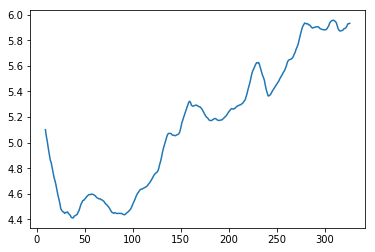

In [56]:
plt.plot(df['MA10_talib'])

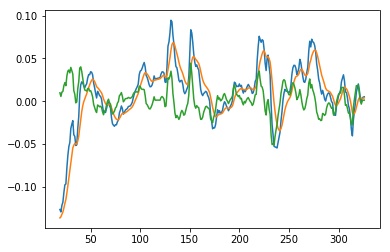

In [66]:
close = [float(x) for x in df['收盘价(元)']]
# # 调用talib计算6日指数移动平均线的值
df['EMA12'] = talib.EMA(np.array(close), timeperiod=6)  
df['EMA26'] = talib.EMA(np.array(close), timeperiod=12)   
 # 调用talib计算MACD指标
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(np.array(close),
                            fastperiod=6, slowperiod=12, signalperiod=9)   
df.tail(12)
plt.plot(df['MACD'])
plt.plot(df['MACDsignal'])
plt.plot(df['MACDhist'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


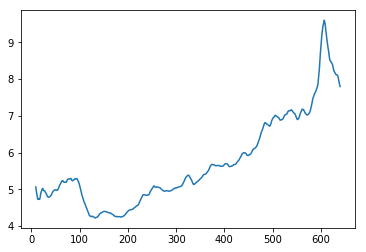

In [57]:
#一个策略当macd下穿signal时，卖出股票
       #当macd上穿signal时，买入股票
df=ts.get_k_data('601939')
df['MA10_rolling'] = pd.rolling_mean(df['close'],10)
close = [float(x) for x in df['close']]
# 调用talib计算10日移动平均线的值
df['MA10_talib'] = talib.MA(np.array(close), timeperiod=10) 
df.tail(12)
plt.plot(df['MA10_talib'])